In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('../../EDA/data/wine_data.csv', usecols=[0,1,2], header=None)

In [6]:
df.head()


,0,1,2
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


In [7]:
df.columns = ['Class Label', 'Alcohol', 'Malic acid']

In [8]:
df.head()


,Class Label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


<Axes: xlabel='Alcohol', ylabel='Density'>

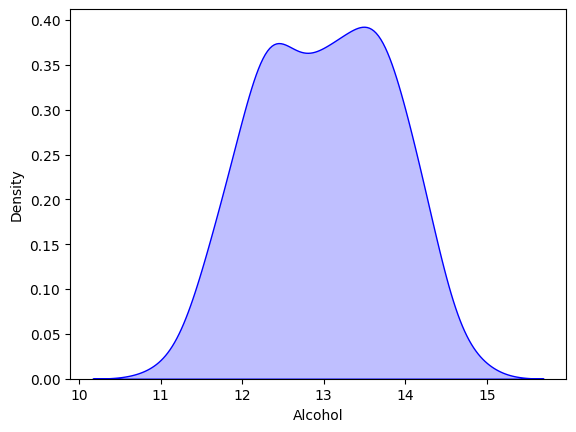

In [16]:
sns.kdeplot(df['Alcohol'], fill=True, label='Alcohol', color='blue')



<Axes: xlabel='Malic acid', ylabel='Density'>

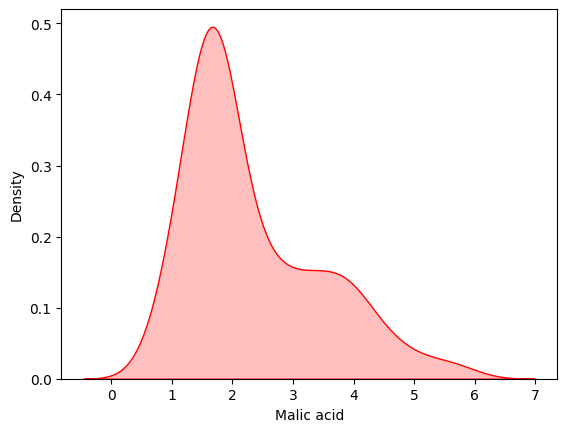

In [19]:
sns.kdeplot(df['Malic acid'], fill=True, label='Malic acid', color='red')

<Axes: xlabel='Alcohol', ylabel='Malic acid'>

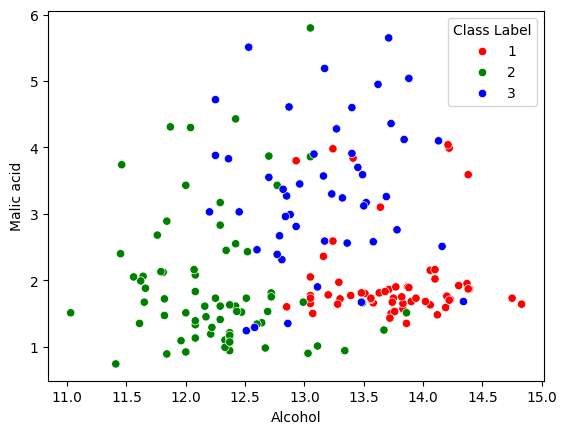

In [20]:
color_dict = {1: 'red', 2: 'green', 3: 'blue'}
sns.scatterplot(x='Alcohol', y='Malic acid', hue=df['Class Label'], palette=color_dict, data=df)

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop('Class Label', axis=1), df['Class Label'], test_size=0.2, random_state=0)

X_train.shape, X_test.shape

((142, 2), (36, 2))

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)  # Fit the scaler to the training data

X_train_scaled = scaler.transform(X_train) # Transform the training data
X_test_scaled = scaler.transform(X_test) # Transform the test data using the same scaler fitted on the training data



In [25]:
#.transform() method returns a numpy array, so we convert it back to a DataFrame for better readability

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [ ]:
np.round(X_train_scaled.describe(), 1) # np.round(data, decimals) rounds the data to the specified number of decimal places.
#Here, we round the summary statistics to 1 decimal place for better readability.

,Alcohol,Malic acid
count,142.0,142.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


In [31]:
np.round(X_train_scaled.describe(), 1)

,Alcohol,Malic acid
count,142.0,142.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


Text(0.5, 1.0, 'After Scaling')

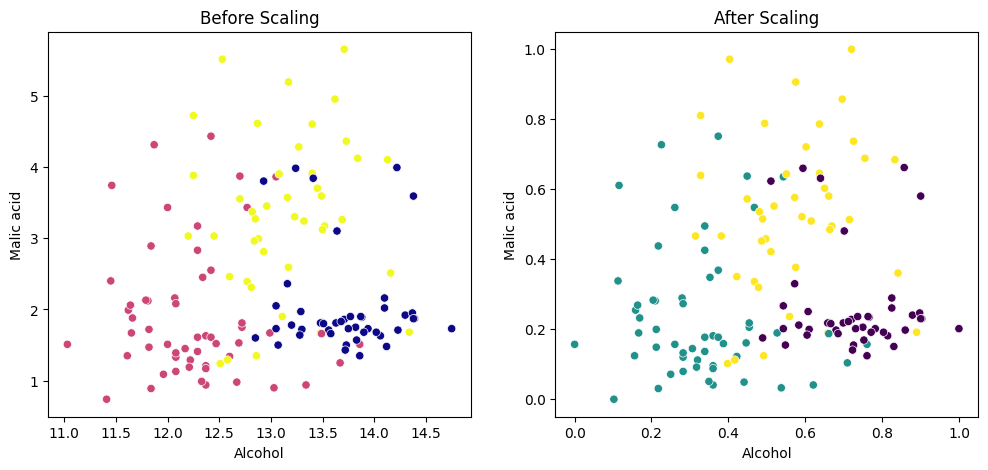

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols= 2, figsize=(12, 5))

sns.scatterplot(x=X_train['Alcohol'], y=X_train['Malic acid'], c=y_train, ax=ax1)
ax1.set_title('Before Scaling')

sns.scatterplot(x=X_train_scaled['Alcohol'], y=X_train_scaled['Malic acid'], c=y_train, ax=ax2)
ax2.set_title('After Scaling')



<Axes: xlabel='Malic acid', ylabel='Density'>

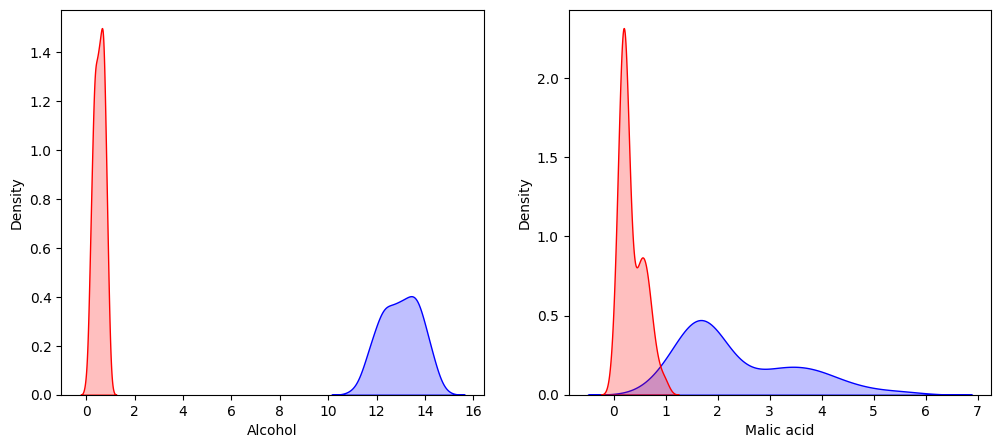

In [45]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
sns.kdeplot(X_train['Alcohol'], fill=True, label='Alcohol', color='blue', ax=ax1)
sns.kdeplot(X_train_scaled['Alcohol'], fill=True, label='Scaled Alcohol', color='red', ax=ax1)

sns.kdeplot(X_train['Malic acid'], fill=True, label='Malic acid', color='blue', ax=ax2)
sns.kdeplot(X_train_scaled['Malic acid'], fill=True, label='Scaled Malic acid', color='red', ax=ax2)

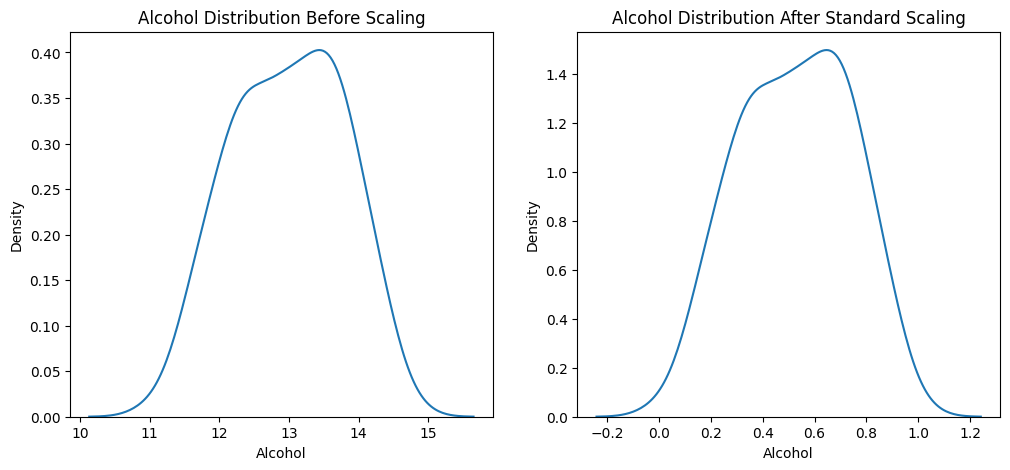

In [46]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Alcohol Distribution Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1)

# after scaling
ax2.set_title('Alcohol Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
plt.show()

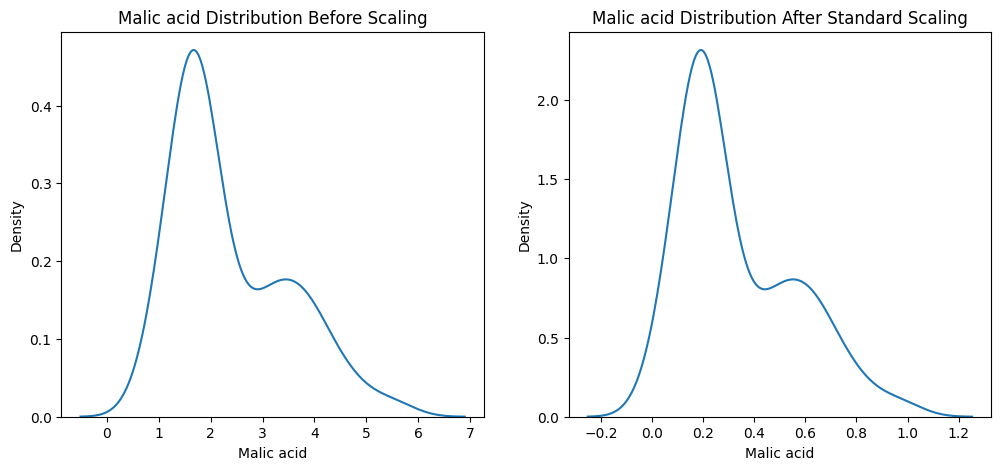

In [47]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Malic acid Distribution Before Scaling')
sns.kdeplot(X_train['Malic acid'], ax=ax1)

# after scaling
ax2.set_title('Malic acid Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Malic acid'], ax=ax2)
plt.show()

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

model = LinearRegression()
linear = model.fit(X_train, y_train)
y_pred = linear.predict(X_test)

In [59]:
print('R2 Score:', r2_score(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))

R2 Score: 0.2709167318141741
Mean Squared Error: 0.36904214809405994


In [68]:
model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train)

y_scaled_pred = model_scaled.predict(X_test_scaled)

print("\nWith Scaling")
print("R2 Score:", r2_score(y_test, y_scaled_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_scaled_pred))



With Scaling
R2 Score: 0.27091673181417386
Mean Squared Error: 0.36904214809406005
